                Relationship of Housing Price to Targetted Attributes of Boston Housing Dataset

In [1]:
import numpy as np
from numpy import arange
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error


In [2]:
import os
os.getcwd()

'C:\\Users\\Rizal\\Desktop\\BostonHousing_Regression'

## Load Local Data

In [3]:
filename = 'c:/Users/Rizal/Desktop/BostonHousing_Regression/Data/BostonHousing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house = pd.read_csv(filename, delim_whitespace=True, names=names)

## Data Exploration

In [4]:
house.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [5]:
house.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
print(np.shape(house))
print(house.head())
print("\nData summary")
print(house.describe())

(506, 14)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Data summary
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      

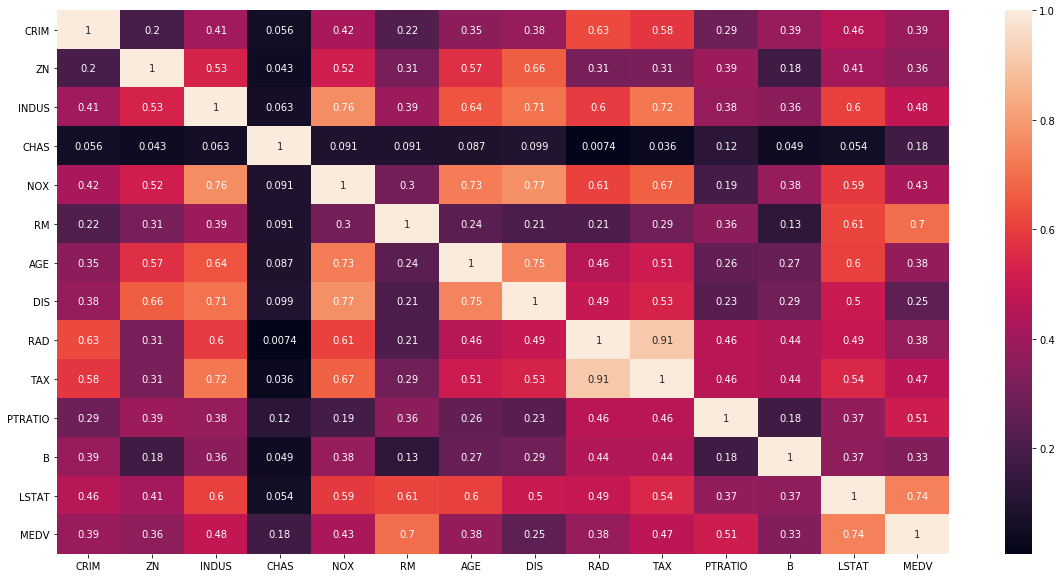

In [7]:
plt.figure(figsize=(20, 10))
sns.heatmap(house.corr().abs(),  annot=True)

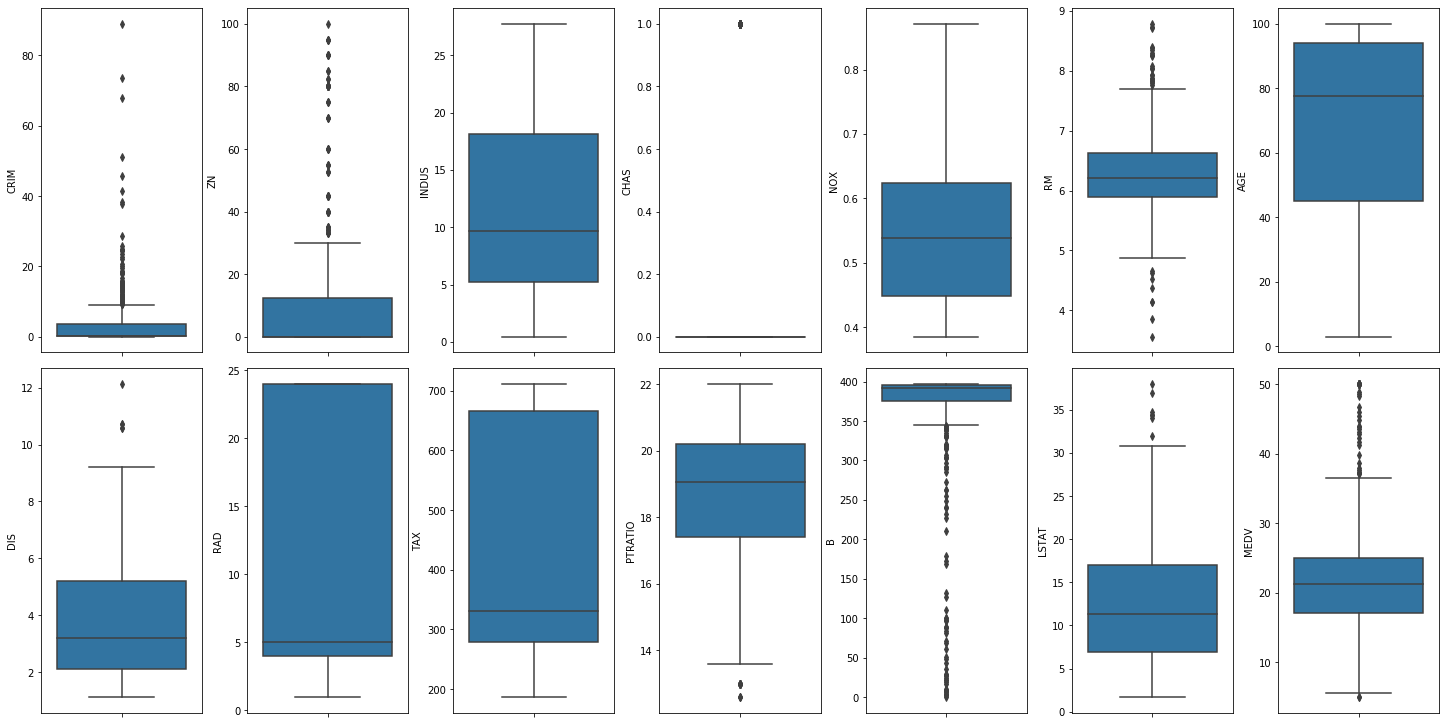

In [8]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in house.items():
    sns.boxplot(y=k, data=house, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

C:\Users\Rizal\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


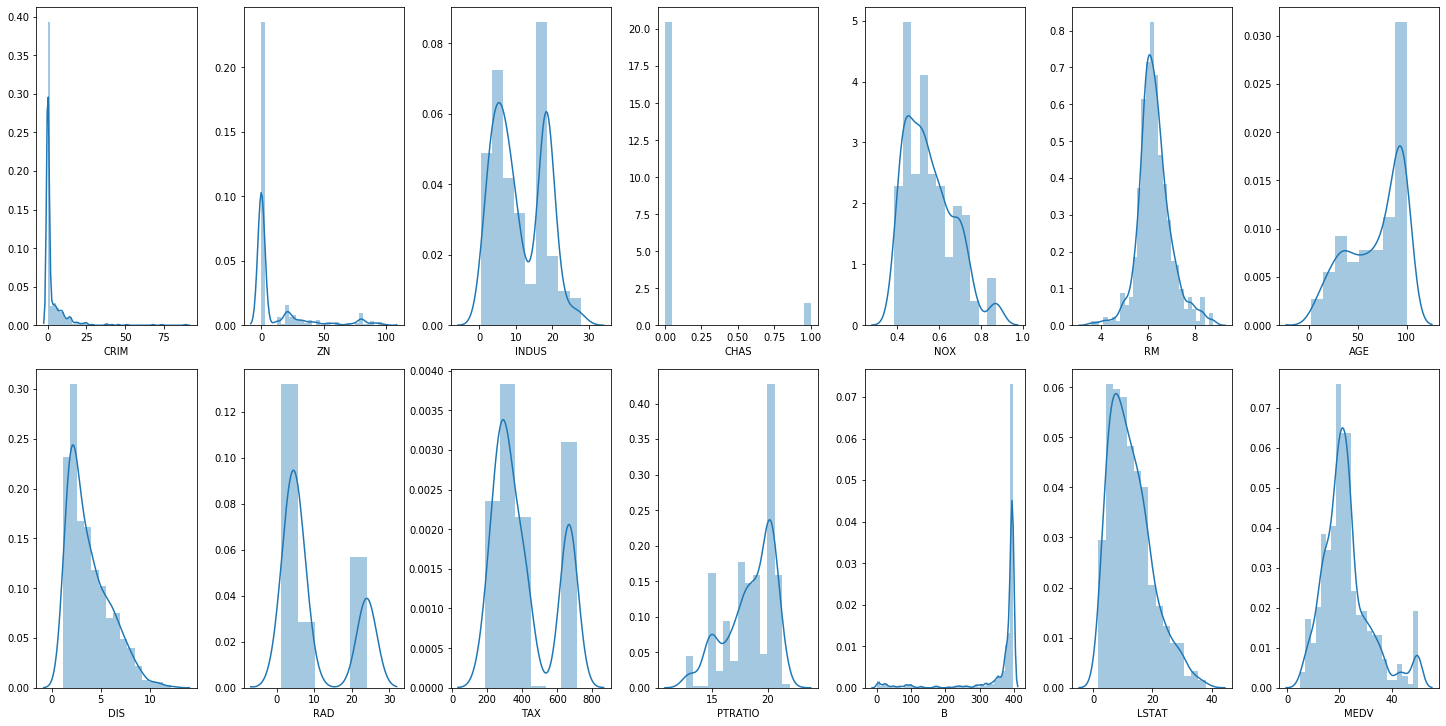

In [9]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in house.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)



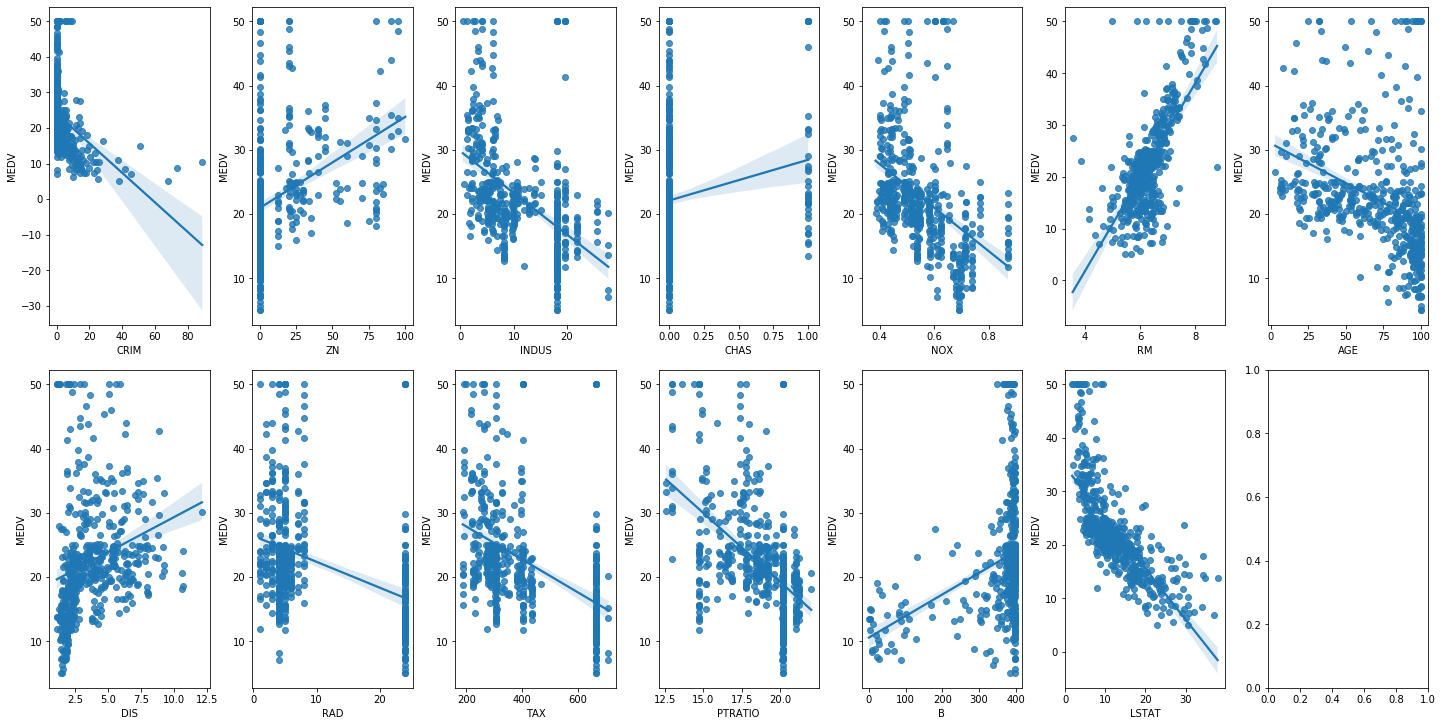

In [10]:
selected_cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT' ]
x = house.loc[:,selected_cols]
y = house['MEDV']

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(selected_cols):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [11]:
#house.drop(['B'], axis=1)

 ## Split-out validation dataset

In [12]:
array = house.values
X = array[:,0:13]
Y = array[:,13]

test_size = 0.3
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


   ## Evaluating the Models

In [13]:
num_folds = 10
seed = 7
scoring = 'neg_root_mean_squared_error'

In [14]:
# Evaluate Algorithms
# Test options and evaluation metric

# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: -4.861023 (0.788727)
LASSO: -5.338277 (0.888209)
EN: -5.462065 (0.882455)
KNN: -6.392025 (1.059319)
CART: -5.277247 (1.463466)
SVR: -8.325999 (1.915305)


### Standardise the Dataset

In [15]:
stand_pipes = []
stand_pipes.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
stand_pipes.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
stand_pipes.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
stand_pipes.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
stand_pipes.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
stand_pipes.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))


results = []
names = []
for name, model in stand_pipes:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)  

ScaledLR: -4.861023 (0.788727)
ScaledLASSO: -5.276807 (0.929029)
ScaledEN: -5.404124 (1.063986)
ScaledKNN: -4.574393 (1.523191)
ScaledCART: -5.312571 (1.241111)
ScaledSVR: -5.680756 (1.547006)


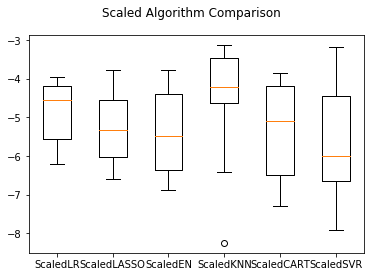

In [16]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Apply Polynomial Feature on the Dataset

In [17]:
poly_pipes = []
poly_pipes.append(('PolyLR', Pipeline([('Scaler', PolynomialFeatures(degree=2, include_bias=False)),('LR', LinearRegression())])))
poly_pipes.append(('PolyLASSO', Pipeline([('Scaler', PolynomialFeatures(degree=2, include_bias=False)),('LASSO', Lasso(max_iter=1000))])))
poly_pipes.append(('PolyEN', Pipeline([('Scaler', PolynomialFeatures(degree=2, include_bias=False)),('EN', ElasticNet(max_iter=1000, tol=0.01))])))
poly_pipes.append(('PolyKNN', Pipeline([('Scaler', PolynomialFeatures(degree=2, include_bias=False)),('KNN', KNeighborsRegressor())])))
poly_pipes.append(('PolyCART', Pipeline([('Scaler', PolynomialFeatures(degree=2, include_bias=False)),('CART', DecisionTreeRegressor())])))
poly_pipes.append(('PolySVR', Pipeline([('Scaler', PolynomialFeatures(degree=2, include_bias=False)),('SVR', SVR())])))

results = []
names = []
for name, model in poly_pipes:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)    

PolyLR: -3.753049 (1.163236)
PolyLASSO: -3.608348 (0.940268)


C:\Users\Rizal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1705.9880242486238, tolerance: 2.8132286949685534
  positive)
C:\Users\Rizal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1595.9754092517064, tolerance: 2.949345487421384
  positive)
C:\Users\Rizal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1710.7503613984045, tolerance: 2.962718355345912
  positive)
C:\Users\Rizal\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

PolyEN: -3.493347 (0.921766)
PolyKNN: -6.788609 (1.135712)
PolyCART: -4.835980 (0.994586)
PolySVR: -8.393436 (1.918927)


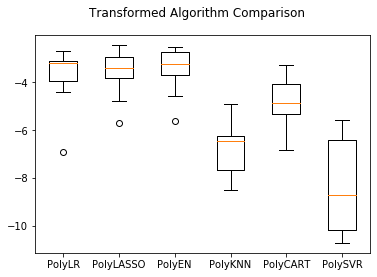

In [18]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Transformed Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [19]:
#Transform the Dataset 
pr=PolynomialFeatures(degree=2)
PF_X_train=pr.fit_transform(X_train)
PF_X_test=pr.fit_transform(X_test)

In [20]:
#Stardardise the Dataset
StdX_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
StdX_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)



### Tuning of Chosen Model

#### Tuning of KNN 

In [21]:
# KNN Algorithm tuning

k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -6.392025 using {'n_neighbors': 5}
-7.548600 (1.605816) with: {'n_neighbors': 1}
-6.509867 (0.968291) with: {'n_neighbors': 3}
-6.392025 (1.059319) with: {'n_neighbors': 5}
-6.510484 (0.997871) with: {'n_neighbors': 7}
-6.637128 (1.161935) with: {'n_neighbors': 9}
-6.830597 (1.264213) with: {'n_neighbors': 11}
-7.036239 (1.221791) with: {'n_neighbors': 13}
-7.245733 (1.332697) with: {'n_neighbors': 15}
-7.364248 (1.317588) with: {'n_neighbors': 17}
-7.556918 (1.369346) with: {'n_neighbors': 19}
-7.704645 (1.447744) with: {'n_neighbors': 21}


#### Tuning of KNN by Standardising

In [22]:
# KNN Algorithm tuning

k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(StdX_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -4.325693 using {'n_neighbors': 3}
-4.683886 (1.775302) with: {'n_neighbors': 1}
-4.325693 (1.495457) with: {'n_neighbors': 3}
-4.554062 (1.548421) with: {'n_neighbors': 5}
-4.593331 (1.434284) with: {'n_neighbors': 7}
-4.668057 (1.313773) with: {'n_neighbors': 9}
-4.791039 (1.339115) with: {'n_neighbors': 11}
-4.799803 (1.324654) with: {'n_neighbors': 13}
-4.893221 (1.348501) with: {'n_neighbors': 15}
-4.974543 (1.310657) with: {'n_neighbors': 17}
-5.063419 (1.307670) with: {'n_neighbors': 19}
-5.163998 (1.331940) with: {'n_neighbors': 21}


#### Tuning of KNN by Polynomial Features

In [23]:
# KNN Algorithm tuning

k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(PF_X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -6.782740 using {'n_neighbors': 7}
-7.795131 (1.641118) with: {'n_neighbors': 1}
-6.972713 (1.020913) with: {'n_neighbors': 3}
-6.788609 (1.135712) with: {'n_neighbors': 5}
-6.782740 (1.183064) with: {'n_neighbors': 7}
-6.872297 (1.311421) with: {'n_neighbors': 9}
-7.066401 (1.399915) with: {'n_neighbors': 11}
-7.183773 (1.417431) with: {'n_neighbors': 13}
-7.377380 (1.430059) with: {'n_neighbors': 15}
-7.535009 (1.346739) with: {'n_neighbors': 17}
-7.636967 (1.340613) with: {'n_neighbors': 19}
-7.763137 (1.365741) with: {'n_neighbors': 21}


#### Test and Predict on KNN by Standardisation and Polynomial Feature

In [24]:
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(StdX_train, Y_train)
Std_Predictions = KNN.predict(StdX_test)

KNN = KNeighborsRegressor(n_neighbors=7)
KNN.fit(PF_X_train, Y_train)
PF_Predictions = KNN.predict(PF_X_test)    

In [25]:
print("\nMSE for KNN after standardising:",(mean_squared_error(Y_test, Std_Predictions)))
print("R2 score for KNN:",(r2_score(Y_test, Std_Predictions)))
    
print("\nMSE for KNN after Polynomial transform:",(mean_squared_error(Y_test, PF_Predictions)))
print("R2 score for KNN:",(r2_score(Y_test, PF_Predictions)))


MSE for KNN after standardising: 24.883720760233917
R2 score for KNN: 0.6628222415833738

MSE for KNN after Polynomial transform: 41.18720864661655
R2 score for KNN: 0.4419077910126208


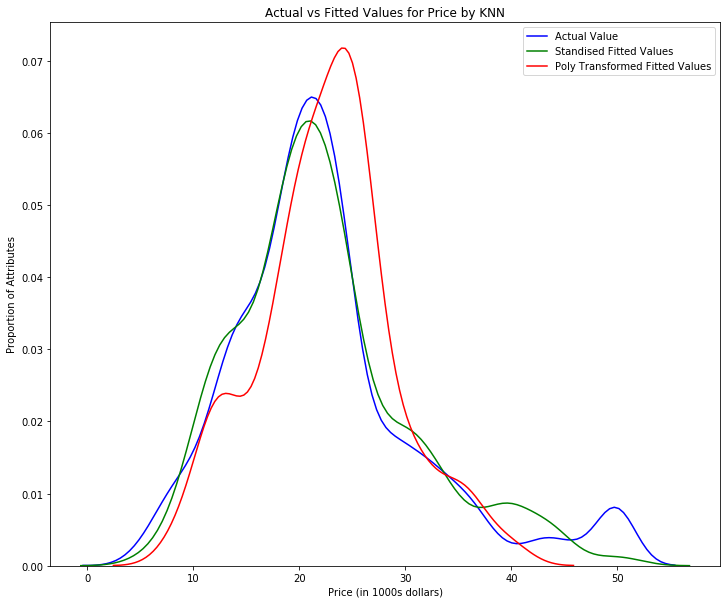

In [26]:
plt.figure(figsize=(12, 10))

ax1 = sns.distplot(house['MEDV'] , hist=False, color="b", label="Actual Value")
sns.distplot(Std_Predictions, hist=False, color="g", label="Standised Fitted Values" , ax=ax1)
sns.distplot(PF_Predictions, hist=False, color="r", label="Poly Transformed Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price by KNN')
plt.xlabel('Price (in 1000s dollars)')
plt.ylabel('Proportion of Attributes')

plt.show()
plt.close()

#### Boosting and Bagging Ensemble

Spotting/Evaluating the Ensemble Algorithms

In [27]:
# ensembles
Boost_Bag = []
Boost_Bag.append(('AB', AdaBoostRegressor()))
Boost_Bag.append(('GB', GradientBoostingRegressor()))
Boost_Bag.append(('RF', RandomForestRegressor()))
Boost_Bag.append(('ET', ExtraTreesRegressor()))

results = []
names = []
for name, model in Boost_Bag:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

AB: -4.086537 (1.017225)
GB: -3.347931 (0.874456)
RF: -3.562152 (1.055035)
ET: -3.233726 (0.900590)


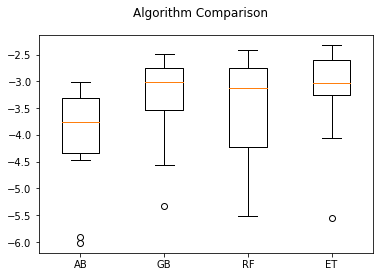

In [28]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Standardising on the Ensembles

In [29]:
Boost_Bag = []
Boost_Bag.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
Boost_Bag.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()),('GB', GradientBoostingRegressor())])))
Boost_Bag.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
Boost_Bag.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in Boost_Bag:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


ScaledAB: -4.091032 (1.050440)
ScaledGB: -3.399563 (0.868323)
ScaledRF: -3.618535 (1.105061)
ScaledET: -3.212406 (0.823288)


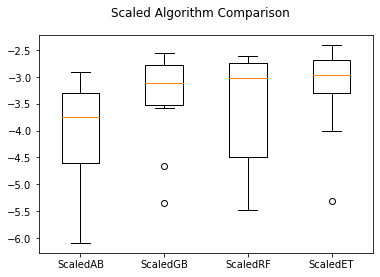

In [30]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Polynomial Transform on the Ensembles

In [31]:
Boost_Bag = []
Boost_Bag.append(('PolyAB', Pipeline([('Scaler', PolynomialFeatures(degree=2, include_bias=False)),('AB', AdaBoostRegressor())])))
Boost_Bag.append(('PolyGB', Pipeline([('Scaler', PolynomialFeatures(degree=2, include_bias=False)),('GB', GradientBoostingRegressor())])))
Boost_Bag.append(('PolyRF', Pipeline([('Scaler', PolynomialFeatures(degree=2, include_bias=False)),('RF', RandomForestRegressor())])))
Boost_Bag.append(('PolyET', Pipeline([('Scaler', PolynomialFeatures(degree=2, include_bias=False)),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in Boost_Bag:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


PolyAB: -3.958906 (0.984633)
PolyGB: -3.281639 (0.763352)
PolyRF: -3.541406 (1.086510)
PolyET: -3.331284 (0.886166)


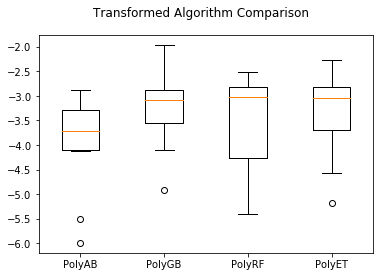

In [32]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Transformed Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Tuning the Ensembles

Determining Best Boosting Ensemble to Tune

In [33]:
Boost = []
Boost.append(('AB', AdaBoostRegressor()))
Boost.append(('GBM', GradientBoostingRegressor()))

names = []
for name, model in Boost:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    
    print("\nMSE for",name,":",(mean_squared_error(Y_test, predictions)))
    print("R2 score for",name,":",(r2_score(Y_test, predictions)))


MSE for AB : 13.339474916184216
R2 score for AB : 0.8192483232699832

MSE for GBM : 10.01294123019199
R2 score for GBM : 0.8643233014996342


Determining Best Bagging Ensemble to Tune

In [34]:
Bag = []
Bag.append(('RF', RandomForestRegressor()))
Bag.append(('ET', ExtraTreesRegressor()))

names = []
for name, model in Bag:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    
    print("\nMSE for",name,":",(mean_squared_error(Y_test, predictions)))
    print("R2 score for",name,":",(r2_score(Y_test, predictions)))


MSE for RF : 12.754827598684209
R2 score for RF : 0.8271703729456883

MSE for ET : 10.722397197368416
R2 score for ET : 0.8547100778578496


#### Tuning of the Best Boosting Ensemble           

Tune and Test With Standardised Training Data

In [35]:
# Tune scaled GBM

param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(StdX_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -3.319315 using {'n_estimators': 250}
-3.484119 (0.911807) with: {'n_estimators': 50}
-3.367961 (0.902609) with: {'n_estimators': 100}
-3.352047 (0.869652) with: {'n_estimators': 150}
-3.333939 (0.858699) with: {'n_estimators': 200}
-3.319315 (0.845265) with: {'n_estimators': 250}
-3.324355 (0.843804) with: {'n_estimators': 300}
-3.323893 (0.838599) with: {'n_estimators': 350}
-3.329203 (0.835639) with: {'n_estimators': 400}


Tune and Test With Polynomial Transformed Training Data

In [36]:
#Tune transformed GBM

param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(PF_X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -3.318665 using {'n_estimators': 400}
-3.443310 (0.809881) with: {'n_estimators': 50}
-3.346797 (0.795709) with: {'n_estimators': 100}
-3.334789 (0.777791) with: {'n_estimators': 150}
-3.329373 (0.771598) with: {'n_estimators': 200}
-3.327680 (0.765413) with: {'n_estimators': 250}
-3.322071 (0.764050) with: {'n_estimators': 300}
-3.319652 (0.763067) with: {'n_estimators': 350}
-3.318665 (0.759527) with: {'n_estimators': 400}


Test and Predict 

In [46]:
#Make predictions on validation dataset
model1 = GradientBoostingRegressor(random_state=seed, n_estimators=250)
model1.fit(X_train, Y_train)

model2 = GradientBoostingRegressor(random_state=seed, n_estimators=250)
model2.fit(StdX_train, Y_train)

model3 = GradientBoostingRegressor(random_state=seed, n_estimators=700)
model3.fit(PF_X_train, Y_train)


predictions = model1.predict(X_test)
print("\nMSE for GB:",(mean_squared_error(Y_test, predictions)))
print("R2 score for GB:",(r2_score(Y_test, predictions)))

Std_GB_predictions = model2.predict(StdX_test)
print("\nMSE for GB after standardising:",(mean_squared_error(Y_test, Std_GB_predictions)))
print("R2 score for GB:",(r2_score(Y_test, Std_GB_predictions)))

PF_GB_predictions = model3.predict(PF_X_test)
print("\nMSE for GB after transforming:",(mean_squared_error(Y_test, PF_GB_predictions)))
print("R2 score for GB:",(r2_score(Y_test, PF_GB_predictions)))


MSE for GB: 9.608993674119212
R2 score for GB: 0.8697968451383393

MSE for GB after standardising: 11.91810199710695
R2 score for GB: 0.8385081172271014

MSE for GB after transforming: 8.839011247148296
R2 score for GB: 0.8802302104396065


Actual vs Fitted Values for Price by Gradient Boost Regressor

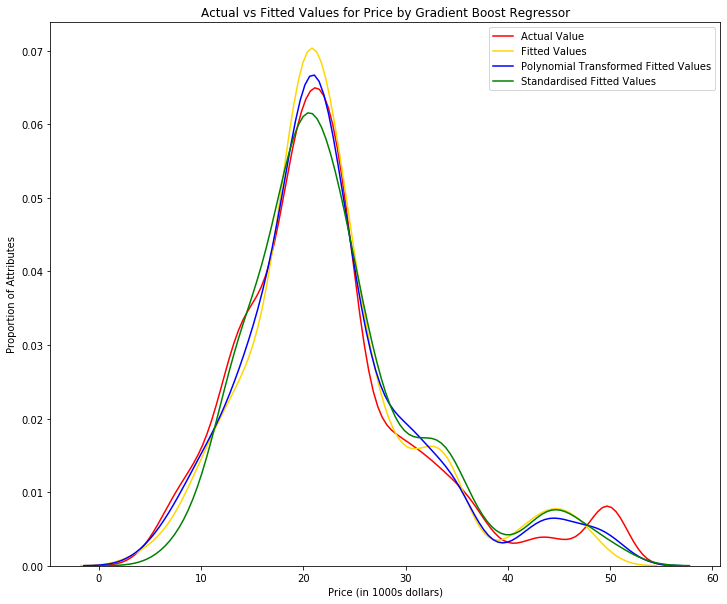

In [38]:
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(house['MEDV'] , hist=False, color="r", label="Actual Value")
sns.distplot(predictions, hist=False, color="gold", label="Fitted Values" , ax=ax1)
sns.distplot(PF_GB_predictions, hist=False, color="b", label="Polynomial Transformed Fitted Values" , ax=ax1)
sns.distplot(Std_GB_predictions, hist=False, color="g", label="Standardised Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price by Gradient Boost Regressor')
plt.xlabel('Price (in 1000s dollars)')
plt.ylabel('Proportion of Attributes')

plt.show()
plt.close()

#### Tuning of the Best Bagging Ensemble 

Tune and Test With Standardised Training Data

In [39]:
#Tune scaled ET

param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = ExtraTreesRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(StdX_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -3.142258 using {'n_estimators': 400}
-3.272846 (0.875825) with: {'n_estimators': 50}
-3.214506 (0.893919) with: {'n_estimators': 100}
-3.177653 (0.921362) with: {'n_estimators': 150}
-3.147837 (0.915290) with: {'n_estimators': 200}
-3.150277 (0.905640) with: {'n_estimators': 250}
-3.146422 (0.904692) with: {'n_estimators': 300}
-3.146662 (0.902890) with: {'n_estimators': 350}
-3.142258 (0.902877) with: {'n_estimators': 400}


Tune and Test With Transformed Training Data

In [40]:
#Tune transformed ET

param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = ExtraTreesRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(PF_X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -3.275297 using {'n_estimators': 350}
-3.378203 (0.966314) with: {'n_estimators': 50}
-3.308725 (0.943147) with: {'n_estimators': 100}
-3.303327 (0.934406) with: {'n_estimators': 150}
-3.302167 (0.948914) with: {'n_estimators': 200}
-3.279832 (0.947232) with: {'n_estimators': 250}
-3.282250 (0.942546) with: {'n_estimators': 300}
-3.275297 (0.941380) with: {'n_estimators': 350}
-3.279368 (0.936671) with: {'n_estimators': 400}


Test and Predict 

In [41]:
#Make predictions on validation dataset
model1 = ExtraTreesRegressor(random_state=seed, n_estimators=100)
model1.fit(X_train, Y_train)

model2 = ExtraTreesRegressor(random_state=seed, n_estimators=450)
model2.fit(StdX_train, Y_train)

model3 = ExtraTreesRegressor(random_state=seed, n_estimators=350)
model3.fit(PF_X_train, Y_train)


ETpredictions = model1.predict(X_test)
print("\nMSE for ET:",(mean_squared_error(Y_test, ETpredictions)))
print("R2 score for ET:",(r2_score(Y_test, ETpredictions)))

Std_ET_predictions = model2.predict(StdX_test)
print("\nMSE for ET after standardising:",(mean_squared_error(Y_test, Std_ET_predictions)))
print("R2 score for GB:",(r2_score(Y_test, Std_ET_predictions)))

PF_ET_predictions = model3.predict(PF_X_test)
print("\nMSE for ET after transforming:",(mean_squared_error(Y_test, PF_ET_predictions)))
print("R2 score for ET:",(r2_score(Y_test, PF_ET_predictions)))


MSE for ET: 10.640745572368417
R2 score for ET: 0.8558164683431733

MSE for ET after standardising: 11.668867865172226
R2 score for GB: 0.8418852731892821

MSE for ET after transforming: 11.748854083780888
R2 score for ET: 0.8408014491842406


#### Actual vs Fitted Values for Price by Extra Trees Regressor

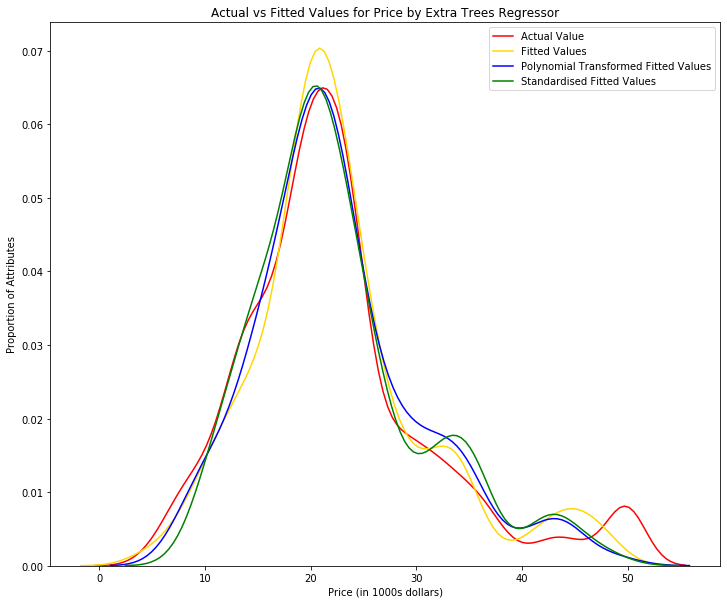

In [42]:
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(house['MEDV'] , hist=False, color="r", label="Actual Value")
sns.distplot(predictions, hist=False, color="gold", label="Fitted Values" , ax=ax1)
sns.distplot(PF_ET_predictions, hist=False, color="b", label="Polynomial Transformed Fitted Values" , ax=ax1)
sns.distplot(Std_ET_predictions, hist=False, color="g", label="Standardised Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price by Extra Trees Regressor')
plt.xlabel('Price (in 1000s dollars)')
plt.ylabel('Proportion of Attributes')

plt.show()
plt.close()

#### Comparison of the Best of the Ensembles 

In [43]:
print("\nMSE for GB after transforming:",(mean_squared_error(Y_test, PF_GB_predictions)))
print("R2 score for GB:",(r2_score(Y_test, PF_GB_predictions)))


print("\nMSE for ET:",(mean_squared_error(Y_test, ETpredictions)))
print("R2 score for ET:",(r2_score(Y_test, ETpredictions)))


MSE for GB after transforming: 8.826102558524235
R2 score for GB: 0.8804051249042196

MSE for ET: 10.640745572368417
R2 score for ET: 0.8558164683431733


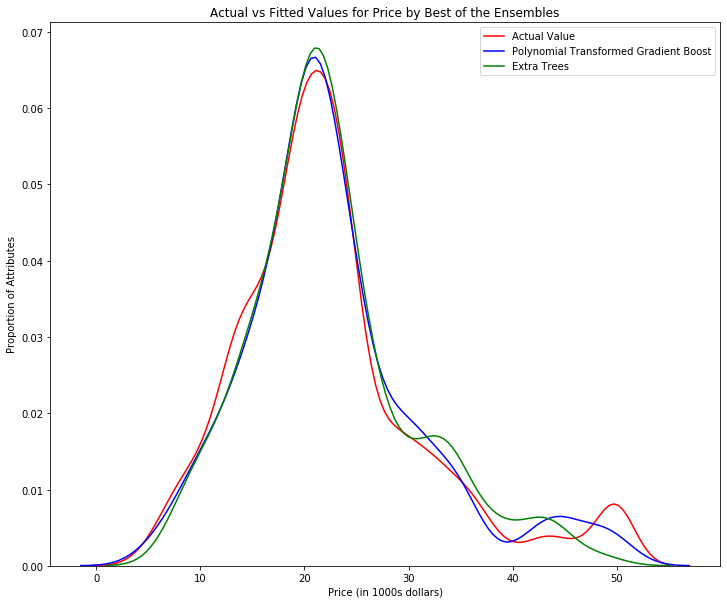

In [44]:
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(house['MEDV'] , hist=False, color="r", label="Actual Value")
sns.distplot(PF_GB_predictions, hist=False, color="b", label="Polynomial Transformed Gradient Boost" , ax=ax1)
sns.distplot(ETpredictions, hist=False, color="g", label="Extra Trees" , ax=ax1)

plt.title('Actual vs Fitted Values for Price by Best of the Ensembles')
plt.xlabel('Price (in 1000s dollars)')
plt.ylabel('Proportion of Attributes')

plt.show()
plt.close()

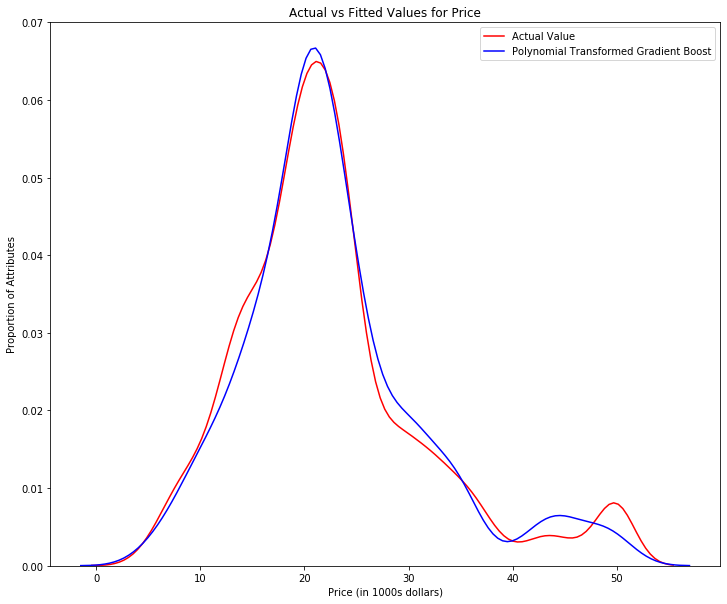

In [45]:
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(house['MEDV'] , hist=False, color="r", label="Actual Value")
sns.distplot(PF_GB_predictions, hist=False, color="b", label="Polynomial Transformed Gradient Boost" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in 1000s dollars)')
plt.ylabel('Proportion of Attributes')

plt.show()
plt.close()